In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("../DATA/rock_density_xray.csv")
df.columns=['Signal',"Density"]
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Polinomial regression

In [40]:
def run_model(model,X_train,y_train,X_test,y_test):
    # Обучение модели
    model.fit(X_train,y_train)
    
    # Вычисление метрик
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'RMSE : {rmse}')
    print(f'MAE : {mae}')
    
    # Рисуем график с результатами
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,5),dpi=90)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

RMSE : 0.2928014017261052
MAE : 0.2369211828242143


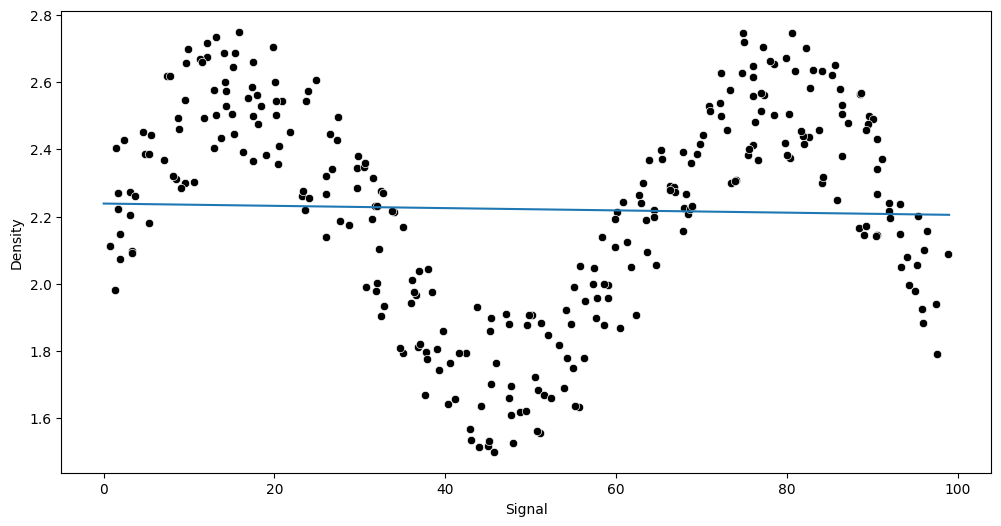

In [25]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [27]:
pipe = make_pipeline(PolynomialFeatures(degree = 2),LinearRegression())

RMSE : 0.28551731918264184
MAE : 0.23856273226353808


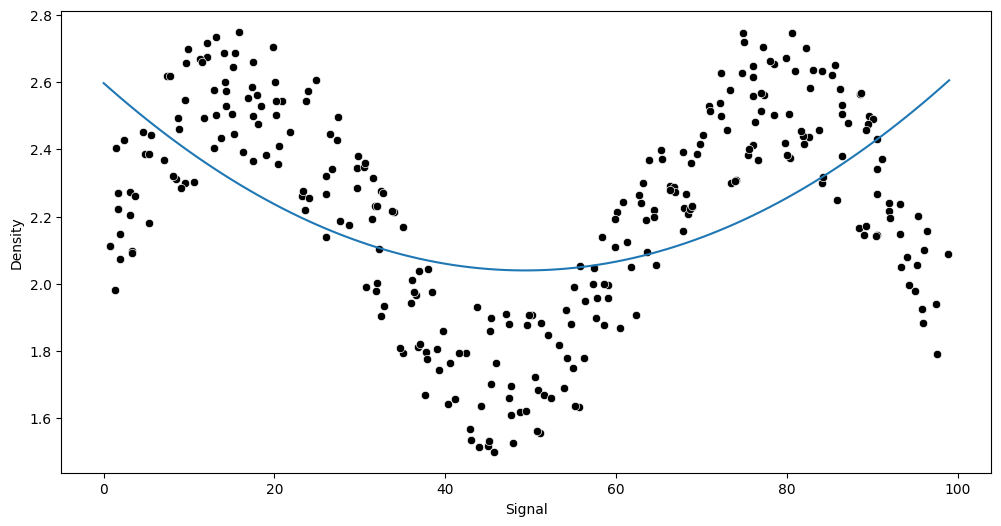

In [28]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Сравнение различных степеней полинома

RMSE : 0.13328124387882448
MAE : 0.11503333720555303


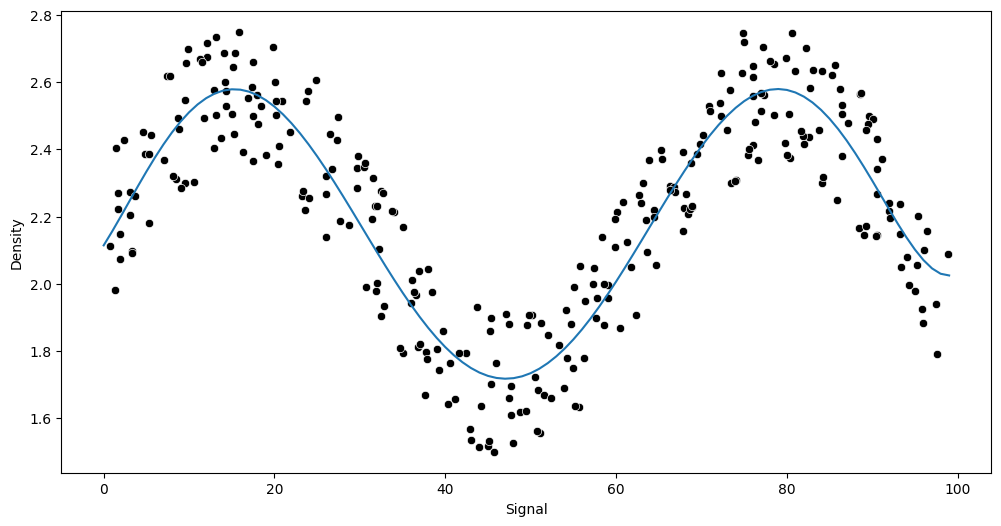

In [29]:
pipe = make_pipeline(PolynomialFeatures(degree = 6),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

### Регрессия KNN

In [30]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1408050741503751
MAE : 0.12059189553582521


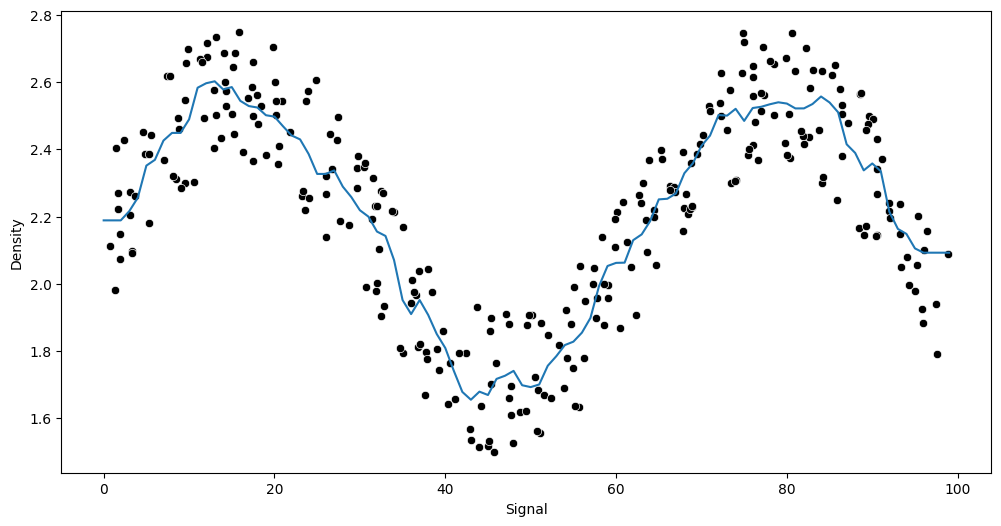

In [33]:
preds = {}
k_values = [10] #,[1,5,10, 30]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

## Деревья решений для регрессииДеревья решений для регрессии

In [34]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.16153547162673088
MAE : 0.12817936228823248


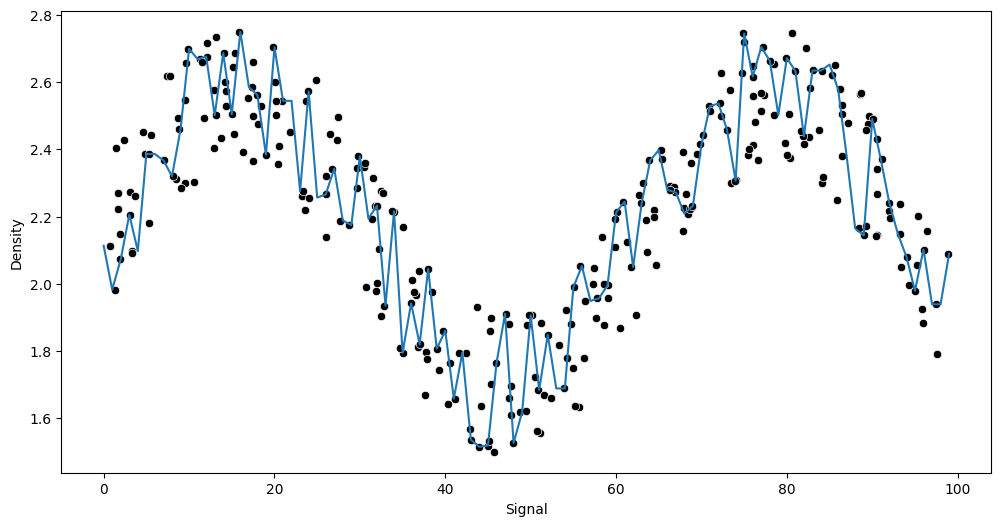

In [35]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

#### Метод опорных векторов для регрессии

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

RMSE : 0.13004609494553804
MAE : 0.11127327567318512


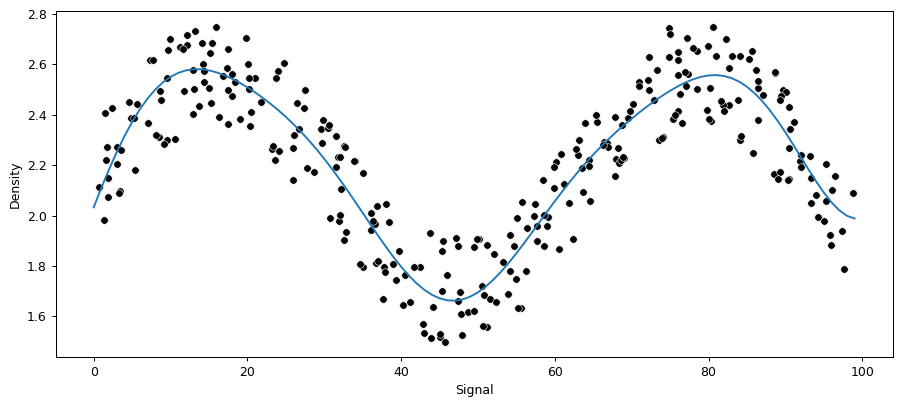

In [41]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()
grid = GridSearchCV(svr,param_grid)
run_model(grid,X_train,y_train,X_test,y_test)

#### Случайные леса для регрессии

In [42]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.14269065457548044
MAE : 0.11630422146317863


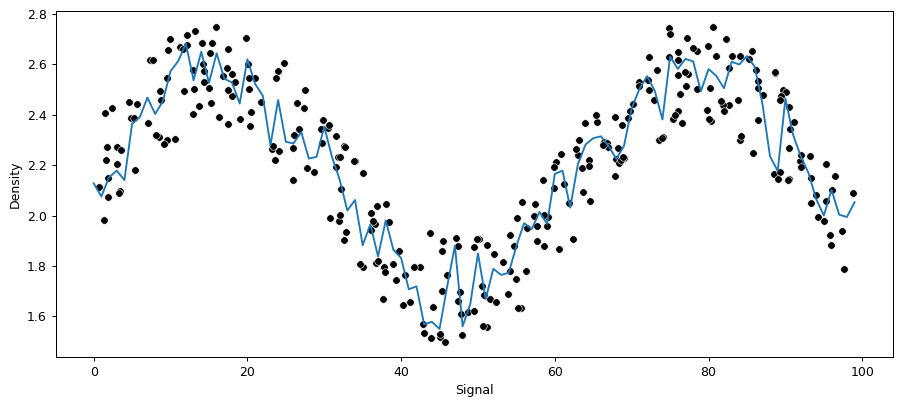

In [43]:
trees = [100] # [10,50,100]
for n in trees:
    model = RandomForestRegressor(n_estimators=n)
    run_model(model,X_train,y_train,X_test,y_test)

#### Градиентный бустинг

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE : 0.13336766447799286
MAE : 0.11184318220220522


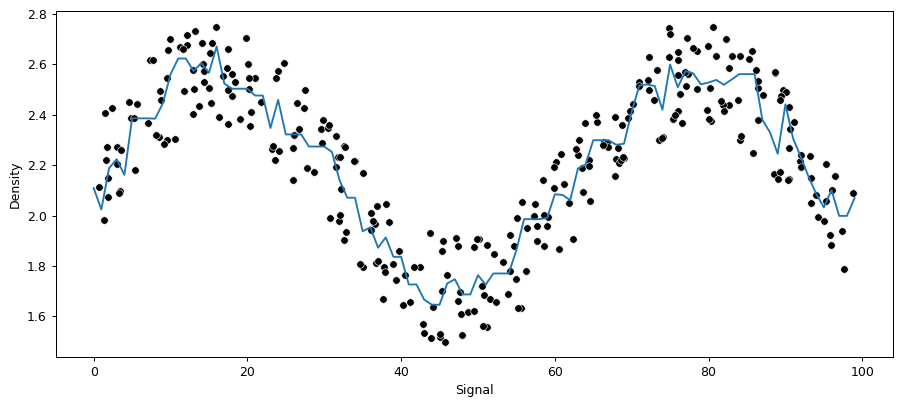

In [45]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

#### Adaboost

In [46]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13336766447799286
MAE : 0.11184318220220522


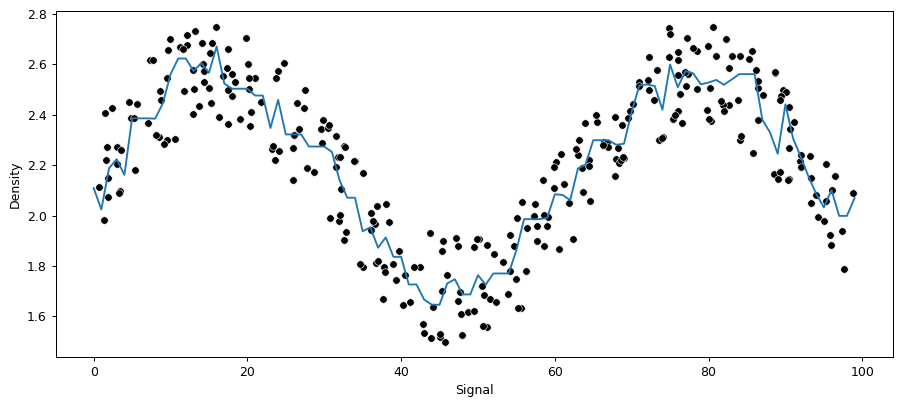

In [47]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)